/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jenkinsfamily/opt/

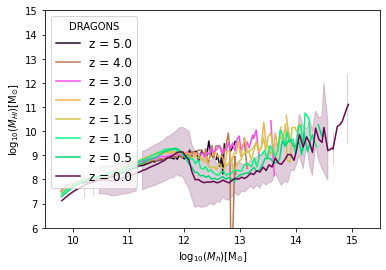

In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
import pandas as pd
from dragons import meraxes, munge
import random
import sys
from Functions import *
import statistics 
import seaborn as sns

fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)
snaplist = meraxes.io.read_snaplist(fname_in, h)    
snaps = snaplist[0]
fig, ax = plt.subplots(1, 1)
nbins = 100
#reversed_snaps = np.flip(snaps)

for i in snaps: #start at end and go back, so last is z=0 for sigma
#gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True, pandas=True)
    gals, sim_props, snaplist = get_gal_catalogue(i)
    snaplist_index_used = list(snaplist[0]).index(i)# convert to list and find the index of the snap we are using
    redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
    redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int

    # Log the masses : CONERT TO PROPER UNITS
    gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
    gals["Mvir"] = np.log10(gals["Mvir"]*1e10)

    #gals.describe()# summarise the stats of HIMass
    #gals_ran.shape # returns number of galaxies
    #gals.dtypes #returns types of available properties
    #gals.columns #returns all avaiable properties of galxies
    # remove infs
    gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
    # drop nan values
    gals.dropna()
    # Split the data into 1000 quantiles (varies bin width to keep same number of data points in each bin)
    gals["Mvir_group"] = pd.cut(gals["Mvir"], bins=nbins)

    # Group galaxies by Mvir_group 
    grouped = gals.groupby("Mvir_group")

    # Get parameters of each group and save as results_df
    results_df_HIMass = grouped["HIMass"].agg(["mean", "median", "std", "size"])
    results_df_Mvir = grouped["Mvir"].agg(["mean", "median", "std", "size"])
    #results_df_HIMass.sort_values(by='size', ascending=False)
    # drop last row 
    #results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
    #results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows

    Mvir_mean = results_df_Mvir["mean"]
    Mvir_std = results_df_Mvir["std"]

    HIMass_median = results_df_HIMass['median']
    HIMass_std = results_df_HIMass["std"]
    # Now plot
    ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
    ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
    ax.set_ylim([6,15])
    ax.set_xlim([9.5,15.5])
    label_z = ("z = " + redshift_used)
    color_used=np.random.rand(3,)
    ax.plot(Mvir_mean, HIMass_median, color=color_used, label=label_z)

ax.fill_between(Mvir_mean, 
                HIMass_median - HIMass_std, 
                HIMass_median + HIMass_std, 
                alpha=0.2, color =color_used)

label_sigma = ("shaded = $1\sigma$")
plt.legend(title=("DRAGONS"),
           loc='upper left',
           fontsize=12)

nbins = str(nbins)
name_of_plot=("Alice_MHI_Mvir_" + nbins + "_shaded_allz_onesigma")
plt.savefig("plots/" + name_of_plot + ".pdf")
